In [260]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [221]:
# Read data 
df = pd.read_csv('/home/stefan/stef/Disk/Projects/SkillTask2/data/train.csv/train.csv')

In [222]:
# Create copy of a dataframe
data = df.copy()

In [223]:
data.head()

,sample_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
0,sample_0,25.609375,6.703125,3.652344,10.039062,169.375,102.8125,1.422852,6.722656,8.015625,...,8.070312,4.363281,5.019531,5.710938,6.343750,6.843750,7.289062,7.617188,7.980469,1.0
1,sample_1,18.343750,5.824219,2.966797,4.902344,164.625,71.8125,1.357422,5.894531,2.753906,...,7.359375,4.195312,4.808594,5.425781,5.949219,6.339844,6.730469,7.074219,7.175781,1.0
2,sample_2,28.562500,6.230469,3.583984,7.882812,159.500,113.1875,1.696289,6.316406,4.605469,...,8.562500,4.523438,5.097656,5.789062,6.457031,6.871094,7.386719,7.878906,8.328125,1.0
3,sample_3,28.062500,6.132812,2.726562,6.378906,169.750,111.0000,1.535156,6.199219,3.712891,...,4.558594,3.533203,3.900391,4.261719,4.042969,3.869141,3.890625,4.042969,4.273438,1.0
4,sample_4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,...,6.613281,4.625000,4.996094,5.328125,5.593750,5.800781,6.027344,6.242188,6.449219,0.0


In [224]:
# Get general information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Columns: 1614 entries, sample_id to y
dtypes: float64(1613), object(1)
memory usage: 13.5+ MB


In [225]:
# Get basic statistical characteristics
data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,27.888784,6.307381,3.227237,7.552864,164.607648,114.376398,1.496589,6.370684,5.343339,7.842965,...,5.889956,4.042059,4.502239,4.966580,5.371013,5.514062,5.709822,5.868557,5.932324,0.612785
std,20.639422,0.453696,0.420215,2.447590,4.183401,113.221960,0.261378,0.434857,2.414132,0.407226,...,2.198822,0.472686,0.608721,0.759738,0.930937,1.135693,1.372481,1.590901,1.861157,0.487336
min,13.351562,5.464844,1.333008,1.700195,152.125000,51.500000,0.919434,5.527344,1.461914,7.117188,...,0.000000,0.693359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.609375,6.003906,2.925781,5.779297,162.062500,81.093750,1.363281,6.070312,3.648438,7.574219,...,5.097656,3.794922,4.234375,4.628906,4.980469,5.035156,5.125000,5.164062,5.128906,0.000000
50%,23.984375,6.218750,3.222656,7.242188,164.250000,95.062500,1.450195,6.292969,4.867188,7.765625,...,6.347656,4.085938,4.589844,5.093750,5.542969,5.695312,5.929688,6.136719,6.265625,1.000000
75%,29.320312,6.570312,3.537109,8.980469,166.437500,116.906250,1.574707,6.625000,6.572266,8.070312,...,7.404297,4.335938,4.890625,5.421875,5.929688,6.230469,6.607422,6.935547,7.189453,1.000000
max,328.000000,9.070312,4.847656,21.406250,184.875000,1833.000000,4.468750,8.898438,19.890625,10.382812,...,11.578125,5.230469,6.003906,6.914062,7.800781,8.601562,9.398438,10.179688,10.929688,1.000000


In [226]:
# Let's look at statistics on non-numerical features. All values are unique.
data.describe(include=['object'])

,sample_id
count,1095
unique,1095
top,sample_202
freq,1


In [227]:
# Check label values
data['y'].unique()

array([1., 0.])

In [228]:
# Check if any columns are empty
col_names = data.columns
for col in col_names:
    if data[col].empty:
        print(f'DataFrame column {name} is empty!')

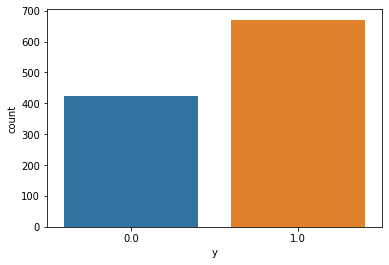

In [229]:
# Check class distribution
sns.countplot(data['y'],label="Sum")
plt.show()

In [230]:
# Replace inf values with np.nan, then replace nan with 0
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data = data.fillna(0) # Check mean

In [231]:
# Check if contains null values
data.isnull().values.any()

False

In [232]:
print("All values are finite: ", np.all(np.isfinite(data.iloc[:,1:].head())))

All values are finite:  True


### Normalize features and split data

In [239]:
# Features
X = data.drop(['sample_id', 'y'], axis=1)
# Labels
y = data['y']

In [240]:
# Features normalization
features_norm = StandardScaler() 
X_std = features_norm.fit_transform(X) 


In [241]:
# Split data in train/test
X_train, x_test, Y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Train base models using cross-validation

In [148]:
# Random forest classifier
rf = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_rf = cross_validate(rf, X_train, Y_train, scoring=scoring, cv=5)

sorted(scores_rf.keys())
forest_fit_time = scores_rf['fit_time'].mean()
forest_score_time = scores_rf['score_time'].mean()
forest_accuracy = scores_rf['test_accuracy'].mean()
forest_precision = scores_rf['test_precision_macro'].mean()
forest_recall = scores_rf['test_recall_macro'].mean()
forest_f1 = scores_rf['test_f1_weighted'].mean()
forest_roc = scores_rf['test_roc_auc'].mean()

In [149]:
# XGBoost classifier
xgb_clf = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_xgb = cross_validate(xgb_clf, X_train, Y_train, scoring=scoring, cv=5)

sorted(scores_xgb.keys())
XGB_fit_time = scores_xgb['fit_time'].mean()
XGB_score_time = scores_xgb['score_time'].mean()
XGB_accuracy = scores_xgb['test_accuracy'].mean()
XGB_precision = scores_xgb['test_precision_macro'].mean()
XGB_recall = scores_xgb['test_recall_macro'].mean()
XGB_f1 = scores_xgb['test_f1_weighted'].mean()
XGB_roc = scores_xgb['test_roc_auc'].mean()

In [150]:
# Support vector machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_svm = cross_validate(SVM, X_train, Y_train, scoring=scoring, cv=5)

sorted(scores_svm.keys())
SVM_fit_time = scores_svm['fit_time'].mean()
SVM_score_time = scores_svm['score_time'].mean()
SVM_accuracy = scores_svm['test_accuracy'].mean()
SVM_precision = scores_svm['test_precision_macro'].mean()
SVM_recall = scores_svm['test_recall_macro'].mean()
SVM_f1 = scores_svm['test_f1_weighted'].mean()
SVM_roc = scores_svm['test_roc_auc'].mean()

In [243]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores_knn = cross_validate(KNN, X_train, Y_train, scoring=scoring, cv=5)

sorted(scores_knn.keys())
KNN_fit_time = scores_knn['fit_time'].mean()
KNN_score_time = scores_knn['score_time'].mean()
KNN_accuracy = scores_knn['test_accuracy'].mean()
KNN_precision = scores_knn['test_precision_macro'].mean()
KNN_recall = scores_knn['test_recall_macro'].mean()
KNN_f1 = scores_knn['test_f1_weighted'].mean()
KNN_roc = scores_knn['test_roc_auc'].mean()

In [263]:
# Comparison of algorithms
models_initial = pd.DataFrame({
    'Model'       : ['Support Vector Machine', 'Random Forest', 'XGBClassifier', 'KNN'],
    'Fitting time': [SVM_fit_time, forest_fit_time, XGB_fit_time, KNN_fit_time],
    'Scoring time': [SVM_score_time, forest_score_time, XGB_score_time, KNN_score_time],
    'Accuracy'    : [SVM_accuracy, forest_accuracy, XGB_accuracy, KNN_accuracy],
    'Precision'   : [SVM_precision, forest_precision, XGB_precision, KNN_precision],
    'Recall'      : [SVM_recall, forest_recall, XGB_recall, KNN_recall],
    'F1_score'    : [SVM_f1, forest_f1, XGB_f1, KNN_f1],
    'AUC_ROC'     : [SVM_roc, forest_roc, XGB_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='AUC_ROC', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Support Vector Machine,3.898561,0.360999,0.770506,0.765493,0.742750,0.765072,0.845206
2,XGBClassifier,1.688386,0.062355,0.760247,0.750365,0.738129,0.757151,0.843954
3,KNN,0.054905,0.674974,0.749961,0.745766,0.715987,0.741650,0.800282
1,Random Forest,0.134638,0.019775,0.731507,0.718880,0.702308,0.726170,0.790657


Text(0, 0.5, 'AUC_ROC')

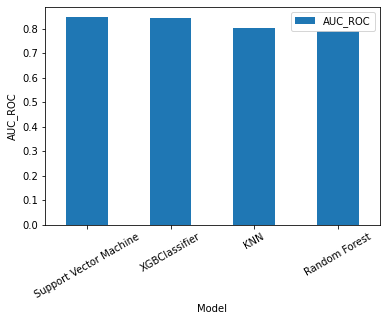

In [265]:
ax = models_initial.sort_values(by='Accuracy', ascending=False).plot.bar(x='Model', y='AUC_ROC', rot=30)
ax.set_ylabel("AUC_ROC")

Recap: Random forest has the lowest accuracy, so we will not use it in stacking

### Dimension reduction using PCA & TSNe

In [281]:
n_comp = 250
pca = PCA(n_components=n_comp)
X_train_pca = pca.fit_transform(X_train)

In [345]:
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

Explained variance: 0.9947


In [290]:
# Random forest classifier
rf = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_rf = cross_validate(rf, X_train_pca, Y_train, scoring=scoring, cv=5)

sorted(scores_rf.keys())
forest_fit_time = scores_rf['fit_time'].mean()
forest_score_time = scores_rf['score_time'].mean()
forest_accuracy = scores_rf['test_accuracy'].mean()
forest_precision = scores_rf['test_precision_macro'].mean()
forest_recall = scores_rf['test_recall_macro'].mean()
forest_f1 = scores_rf['test_f1_weighted'].mean()
forest_roc = scores_rf['test_roc_auc'].mean()

In [284]:
# XGBoost classifier
xgb_clf = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_xgb = cross_validate(xgb_clf, X_train_pca, Y_train, scoring=scoring, cv=5)

sorted(scores_xgb.keys())
XGB_fit_time = scores_xgb['fit_time'].mean()
XGB_score_time = scores_xgb['score_time'].mean()
XGB_accuracy = scores_xgb['test_accuracy'].mean()
XGB_precision = scores_xgb['test_precision_macro'].mean()
XGB_recall = scores_xgb['test_recall_macro'].mean()
XGB_f1 = scores_xgb['test_f1_weighted'].mean()
XGB_roc = scores_xgb['test_roc_auc'].mean()

In [285]:
# Support vector machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_svm = cross_validate(SVM, X_train_pca, Y_train, scoring=scoring, cv=5)

sorted(scores_svm.keys())
SVM_fit_time = scores_svm['fit_time'].mean()
SVM_score_time = scores_svm['score_time'].mean()
SVM_accuracy = scores_svm['test_accuracy'].mean()
SVM_precision = scores_svm['test_precision_macro'].mean()
SVM_recall = scores_svm['test_recall_macro'].mean()
SVM_f1 = scores_svm['test_f1_weighted'].mean()
SVM_roc = scores_svm['test_roc_auc'].mean()

In [286]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores_knn = cross_validate(KNN, X_train_pca, Y_train, scoring=scoring, cv=5)

sorted(scores_knn.keys())
KNN_fit_time = scores_knn['fit_time'].mean()
KNN_score_time = scores_knn['score_time'].mean()
KNN_accuracy = scores_knn['test_accuracy'].mean()
KNN_precision = scores_knn['test_precision_macro'].mean()
KNN_recall = scores_knn['test_recall_macro'].mean()
KNN_f1 = scores_knn['test_f1_weighted'].mean()
KNN_roc = scores_knn['test_roc_auc'].mean()

In [291]:
# Comparison of algorithms
models_pca = pd.DataFrame({
    'Model'       : ['Support Vector Machine', 'Random Forest', 'XGBClassifier', 'KNN'],
    'Fitting time': [SVM_fit_time, forest_fit_time, XGB_fit_time, KNN_fit_time],
    'Scoring time': [SVM_score_time, forest_score_time, XGB_score_time, KNN_score_time],
    'Accuracy'    : [SVM_accuracy, forest_accuracy, XGB_accuracy, KNN_accuracy],
    'Precision'   : [SVM_precision, forest_precision, XGB_precision, KNN_precision],
    'Recall'      : [SVM_recall, forest_recall, XGB_recall, KNN_recall],
    'F1_score'    : [SVM_f1, forest_f1, XGB_f1, KNN_f1],
    'AUC_ROC'     : [SVM_roc, forest_roc, XGB_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_pca.sort_values(by='AUC_ROC', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Support Vector Machine,0.541141,0.057463,0.770500,0.765426,0.742750,0.765096,0.845043
2,XGBClassifier,0.325819,0.007154,0.752234,0.744177,0.723676,0.746711,0.812840
3,KNN,0.006831,0.084418,0.748812,0.744498,0.714516,0.740238,0.801308
1,Random Forest,0.556545,0.021053,0.719208,0.717335,0.674508,0.704109,0.783618


### Build a t-SNE representation:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 876 samples in 0.084s...
[t-SNE] Computed neighbors for 876 samples in 1.920s...
[t-SNE] Computed conditional probabilities for sample 876 / 876
[t-SNE] Mean sigma: 8.696504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.452217
[t-SNE] KL divergence after 500 iterations: 1.001845
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 219 samples in 0.008s...
[t-SNE] Computed neighbors for 219 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 219 / 219
[t-SNE] Mean sigma: 12.647455
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.040627
[t-SNE] KL divergence after 500 iterations: 0.682082


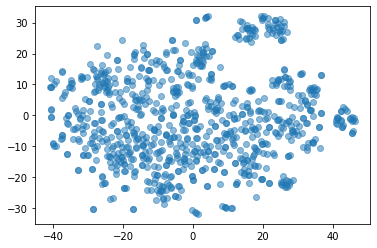

In [330]:
tsne = TSNE(n_components=2, init='pca', random_state=1001, n_iter=500, verbose=1)
X_train_tsne = tsne.fit_transform(X_train)

x_test_tsne = tsne.fit_transform(x_test)

# plot tsne
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=.5);

In [331]:
models = [SVC(probability = True), XGBClassifier(), KNeighborsClassifier()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [332]:
models_ens = list(zip(['SVM', 'XGB', 'KNN'], models))
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train_tsne, Y_train)
pred = model_ens.predict(x_test_tsne)
prob = model_ens.predict_proba(x_test_tsne)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [333]:
models_ensembling_tsne = pd.DataFrame({
    'Model'       : ['Ensembling_soft'],
    'Accuracy'    : [acc_soft],
    'Precision'   : [prec_soft],
    'Recall'      : [recall_soft],
    'F1_score'    : [f1_soft],
    'AUC_ROC'     : [roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling_tsne.sort_values(by='AUC_ROC', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensembling_soft,0.593607,0.615385,0.934307,0.742029,0.485669


### Voting classifier

In [245]:
models = [SVC(probability = True), XGBClassifier(), KNeighborsClassifier()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [266]:
models_ens = list(zip(['SVM', 'XGB', 'KNN'], models))
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, Y_train)
pred = model_ens.predict(x_test)
prob = model_ens.predict_proba(x_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [267]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensembling_soft'],
    'Accuracy'    : [acc_soft],
    'Precision'   : [prec_soft],
    'Recall'      : [recall_soft],
    'F1_score'    : [f1_soft],
    'AUC_ROC'     : [roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='AUC_ROC', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensembling_soft,0.821918,0.826667,0.905109,0.864111,0.891846


### Feature selection

In [335]:
lsvc = LinearSVC().fit(X_train, Y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_svc = model.transform(X_train)
X_train_svc.shape

/home/stefan/anaconda2/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(876, 568)

In [336]:
x_test_svc = model.transform(x_test)
x_test_svc.shape

(219, 568)

In [337]:
models = [SVC(probability = True), XGBClassifier(), KNeighborsClassifier()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [338]:
models_ens = list(zip(['SVM', 'XGB', 'KNN'], models))
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train_svc, Y_train)
pred = model_ens.predict(x_test_svc)
prob = model_ens.predict_proba(x_test_svc)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [339]:
models_ensembling_features_svc = pd.DataFrame({
    'Model'       : ['Ensembling_soft'],
    'Accuracy'    : [acc_soft],
    'Precision'   : [prec_soft],
    'Recall'      : [recall_soft],
    'F1_score'    : [f1_soft],
    'AUC_ROC'     : [roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling_features_svc.sort_values(by='AUC_ROC', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensembling_soft,0.844749,0.84106,0.927007,0.881944,0.899056


### General comparison


In [344]:
model_general = pd.concat([models_initial['Model'], models_initial['AUC_ROC'], 
                           models_pca['Model'], models_pca['AUC_ROC'],
                           models_ensembling_features_svc['Model'], models_ensembling_features_svc['AUC_ROC'],
                           models_ensembling_tsne['Model'], models_ensembling_tsne['AUC_ROC']]
                          , axis=1)

model_general.columns = ['Base models', 'AUC_ROC_1',
                         'Models PCA', 'AUC_ROC_2',
                        'Features sel. SVC (ensembl)', 'AUC_ROC_3', 
                         'Models Ensembl. tsne', 'AUC_ROC_4']

model_general.sort_values(by='AUC_ROC_1', ascending=False)

,Base models,AUC_ROC_1,Models PCA,AUC_ROC_2,Features sel. SVC (ensembl),AUC_ROC_3,Models Ensembl. tsne,AUC_ROC_4
0,Support Vector Machine,0.845206,Support Vector Machine,0.845043,Ensembling_soft,0.899056,Ensembling_soft,0.485669
2,XGBClassifier,0.843954,XGBClassifier,0.812840,NaN,NaN,NaN,NaN
3,KNN,0.800282,KNN,0.801308,NaN,NaN,NaN,NaN
1,Random Forest,0.790657,Random Forest,0.783618,NaN,NaN,NaN,NaN
